In [98]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sklearn.metrics as sm
import matplotlib.patches as mpatches

In [99]:
iris = datasets.load_iris()
print(iris.data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [100]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [101]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Converts Iris Data to Pandas Dataframe 

In [102]:
x = pd.DataFrame(iris.data, columns=["SL", "SW", "PL", "PW"])
y = pd.DataFrame(iris.target, columns=["Target"])

In [103]:
x.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [104]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


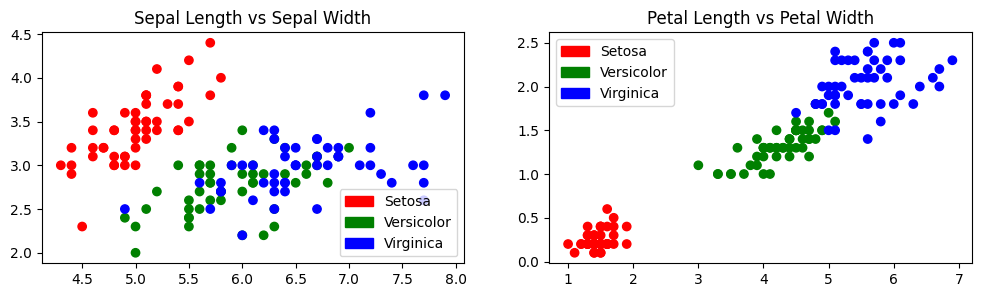

In [105]:
plt.figure(figsize=(12, 3))
colors = np.array(["red", "green", "blue"])
iris.targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color="red", label="Setosa")
green_patch = mpatches.Patch(color="green", label="Versicolor")
blue_patch = mpatches.Patch(color="blue", label="Virginica")
plt.subplot(1, 2, 1)
plt.scatter(x["SL"], x["SW"], c=colors[y["Target"]])
plt.title("Sepal Length vs Sepal Width")
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.subplot(1, 2, 2)
plt.scatter(x["PL"], x["PW"], c=colors[y["Target"]])
plt.title("Petal Length vs Petal Width")
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [106]:
iris_k_mean_model = KMeans(n_clusters=3)  # set K = 3
iris_k_mean_model.fit(x)  # trained using the entire dataset

KMeans(n_clusters=3)

In [107]:
print(iris_k_mean_model.predict(x))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [108]:
print(iris_k_mean_model.cluster_centers_)

[[5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


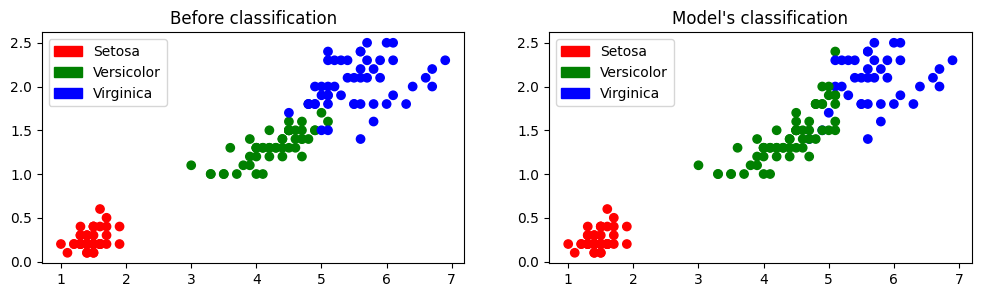

In [109]:
plt.figure(figsize=(12, 3))
colors = np.array(["red", "green", "blue"])
predictedY = np.choose(iris_k_mean_model.labels_, [1, 0, 2]).astype(np.int64)
plt.subplot(1, 2, 1)
plt.scatter(x["PL"], x["PW"], c=colors[y["Target"]])
plt.title("Before classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.subplot(1, 2, 2)
plt.scatter(x["PL"], x["PW"], c=colors[predictedY])
plt.title("Model's classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [110]:
score = sm.accuracy_score(predictedY, y["Target"])
print(f"Accuracy: {round(score*100)}%")

Accuracy: 89%


In [113]:
conf_mat = sm.confusion_matrix(predictedY, y["Target"])
print(f"Cofusion Matrix: \n{conf_mat}")

Cofusion Matrix: 
[[50  0  0]
 [ 0 47 14]
 [ 0  3 36]]
